In [2]:
from models import *
from samplers import *
from tasks import ChebyshevKernelLinearRegression
from matplotlib import pyplot as plt
import numpy as np
import os
from eval import *

0.5
0.5


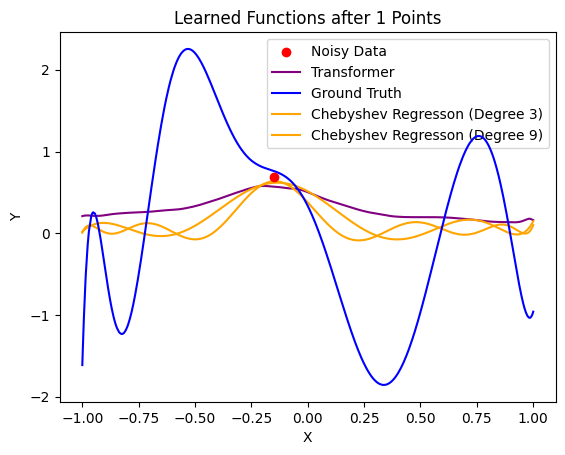

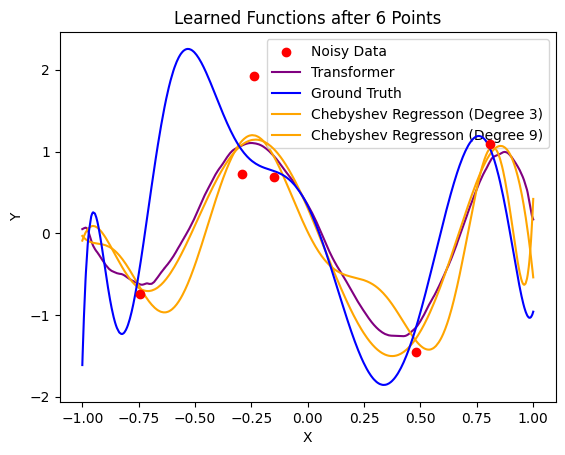

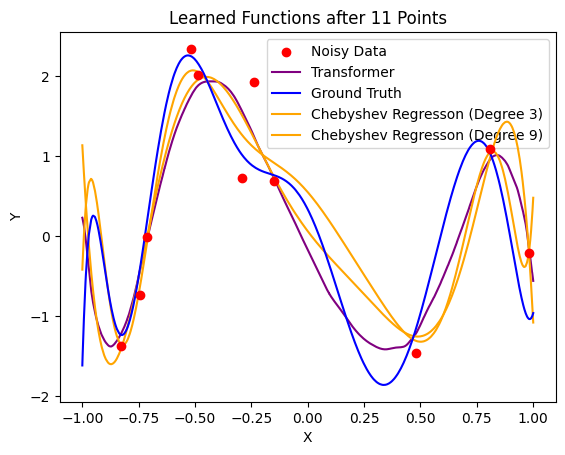

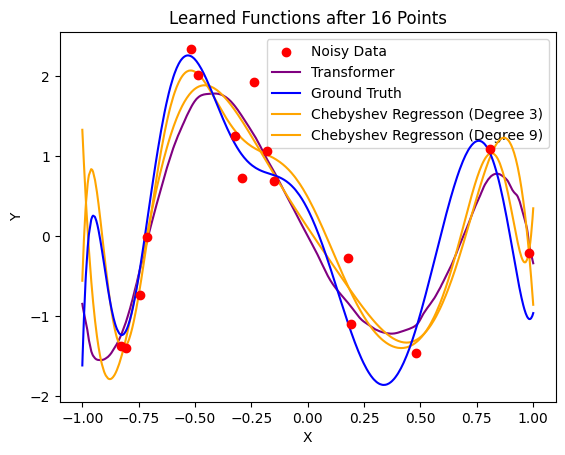

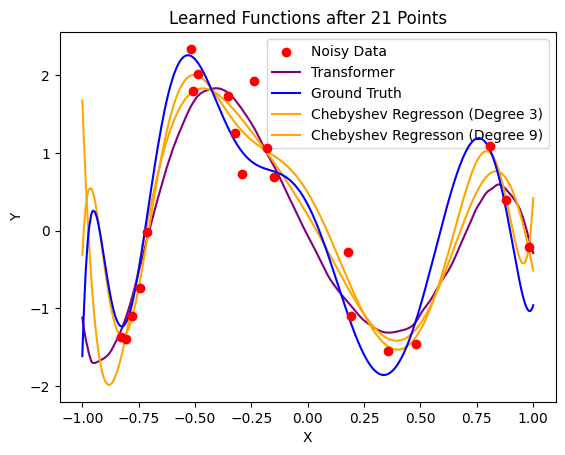

KeyboardInterrupt: 

In [5]:
sampler = UniformSampler(n_dims=1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1, basis_dim=11, different_degrees=False, lowest_degree=11, highest_degree=11)
run_id = "chebyshev-noise-0.5"  # if you train more models, replace with the run_id from the table above
run_dir = "../models"
task_name = "kernel_linear_regression"
run_path = os.path.join(run_dir, task_name, run_id)
model, conf = get_model_from_run(run_path, -1)
transformer_model = model.cuda().eval()
more_xs_for_graphing_truth = sampler.sample_xs(1000, 1)
extra_indices = np.argsort(more_xs_for_graphing_truth.squeeze())
all_xs = sampler.sample_xs(40, 1)
extra_ys = task.evaluate(more_xs_for_graphing_truth, noise=False)
extra_ys = extra_ys.squeeze()
extra_ys = extra_ys[extra_indices]
all_ys = task.evaluate(all_xs, noise=True)
model = ChebyshevKernelLeastSquaresModel(basis_dim=11)
model_no_ridge = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=11, ridge=0.5)
model_low_degree = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=8, ridge=0.5)
for i in range(1, 41, 5):
    xs = all_xs[:,:i,:]
    ys = all_ys[:,:i]
    extra_transformer_estimated = get_imputed_ys(transformer_model, task, xs, ys, more_xs_for_graphing_truth, noise=True, smoothing=0)
    extra_predicted = model.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    no_ridge_predicted = model_no_ridge.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    low_degree_predicted = model_low_degree.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    low_degree_predicted = low_degree_predicted.squeeze()[extra_indices]
    extra_predicted = extra_predicted.squeeze()[extra_indices]
    extra_transformer_estimated = extra_transformer_estimated.squeeze()[extra_indices]
    no_ridge_predicted = no_ridge_predicted.squeeze()[extra_indices]
    graphing_x = more_xs_for_graphing_truth.squeeze()[extra_indices]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Learned Functions after ' + str(i) + ' Points')
    ax.scatter(xs.squeeze(), ys.squeeze(), color='red', label='Noisy Data',zorder=3000)
    ax.plot(graphing_x, extra_transformer_estimated, color='purple', label='Transformer')
    #ax.plot(graphing_x, extra_predicted, color='green', label='Chebyshev Regresson (Degree 9)', zorder=1000)
    ax.plot(graphing_x, extra_ys, color='blue', label='Ground Truth',zorder=2000)
    ax.plot(graphing_x, low_degree_predicted, color='orange', label='Chebyshev Regresson (Degree 3)', zorder=500)
    ax.plot(graphing_x, no_ridge_predicted, color='orange', label='Chebyshev Regresson (Degree 9)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    plt.savefig('polynomials/chebyshev_kernel_regression_' + str(i) + '.png')
    plt.show()


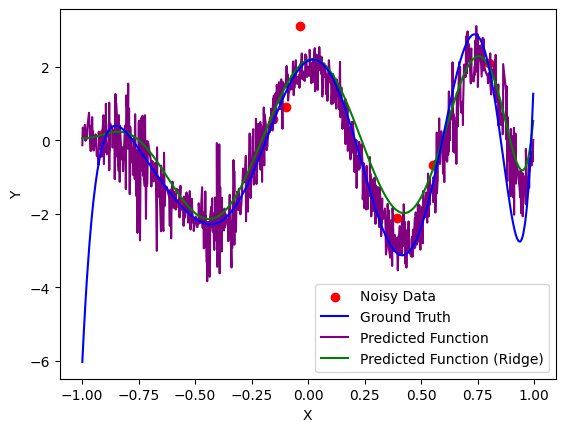

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, color='red', label='Noisy Data')
ax.plot(more_xs_for_graphing_truth, extra_ys, color='blue', label='Ground Truth', zorder=1000)
ax.plot(more_xs_for_graphing_truth, extra_transformer_estimated, color='purple', label='Predicted Function')
ax.plot(more_xs_for_graphing_truth, extra_predicted, color='green', label='Predicted Function (Ridge)', zorder=500)
#ax.plot(more_xs_for_graphing_truth, no_ridge_predicted, color='orange', label='Predicted Function (No Ridge)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

0.5
0.5


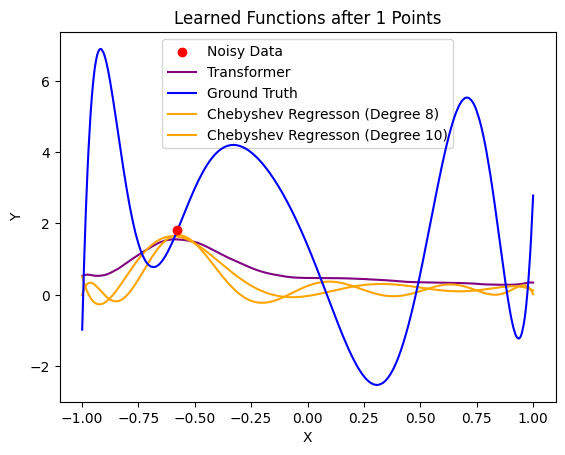

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 1, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 1 points: tensor([[[-0.9174]]])


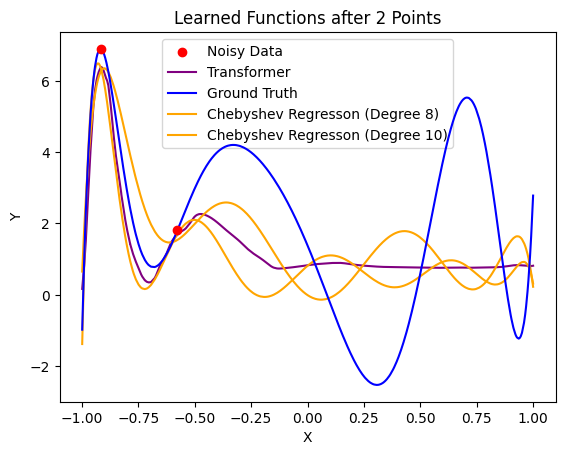

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 2, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 2 points: tensor([[[0.7061]]])


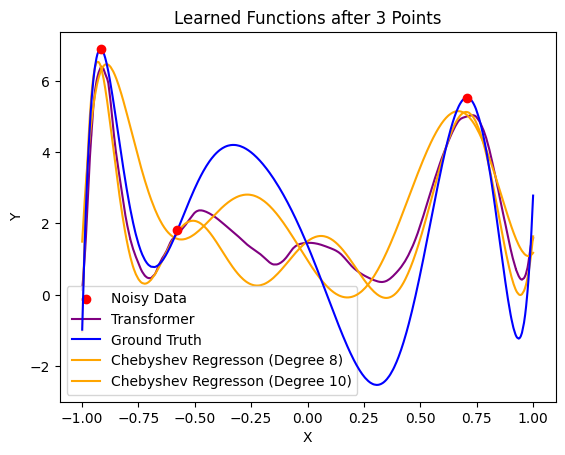

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 3, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 3 points: tensor([[[0.2891]]])


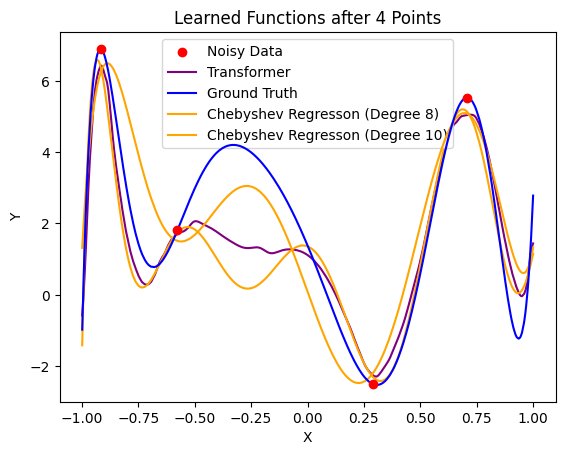

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 4, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 4 points: tensor([[[-0.2903]]])


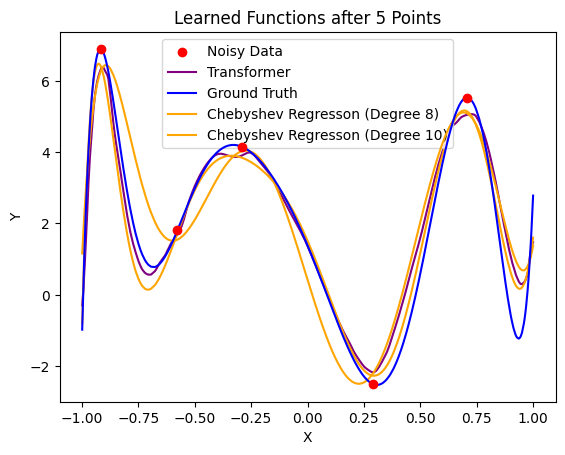

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 5, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 5 points: tensor([[[0.9133]]])


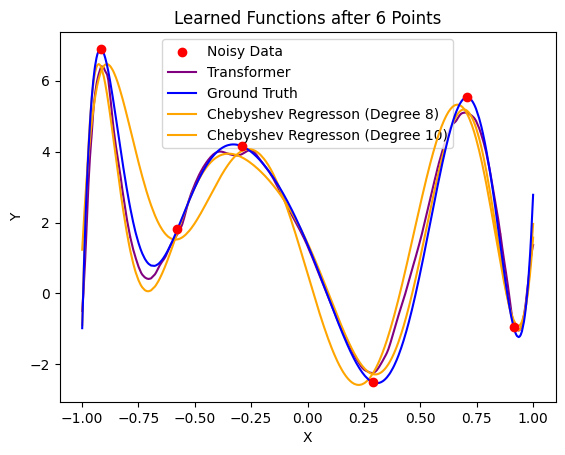

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 6, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 6 points: tensor([[[0.9997]]])


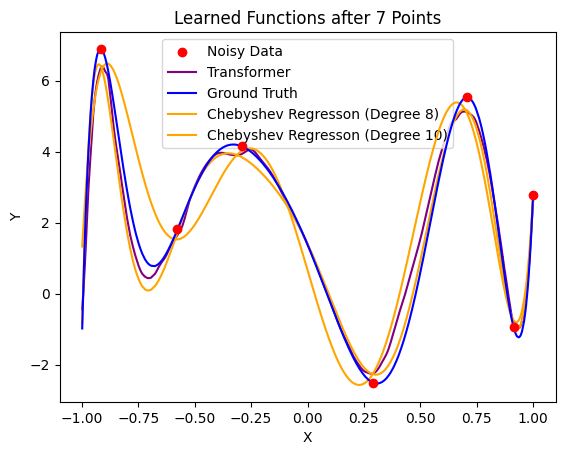

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 7, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 7 points: tensor([[[0.4411]]])


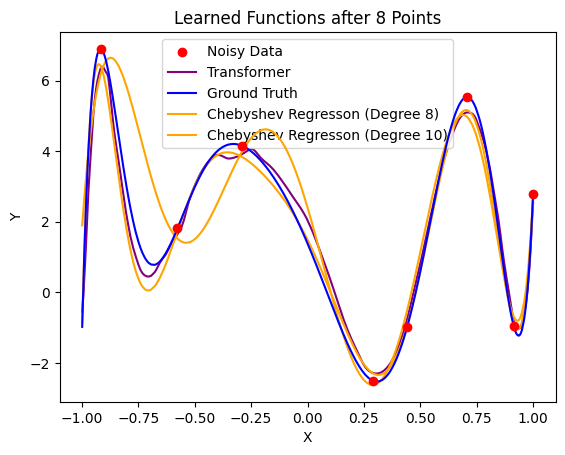

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 8, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 8 points: tensor([[[-0.9615]]])


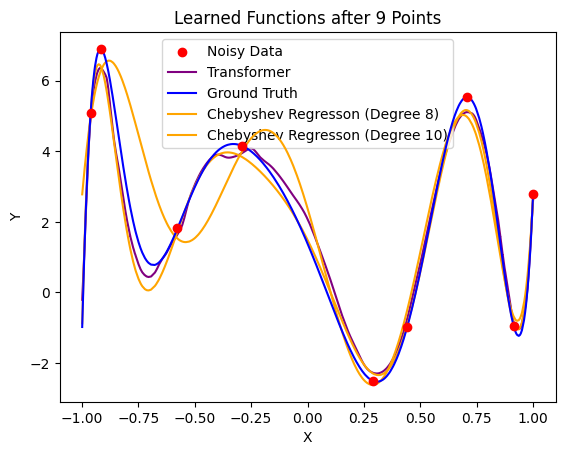

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 9, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 9 points: tensor([[[-0.8540]]])


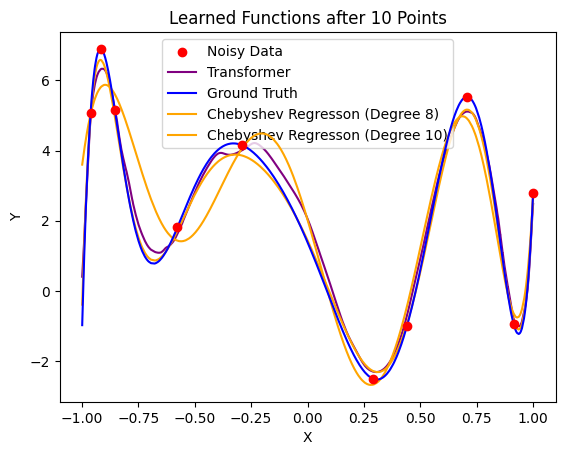

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 10, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 10 points: tensor([[[-0.9985]]])


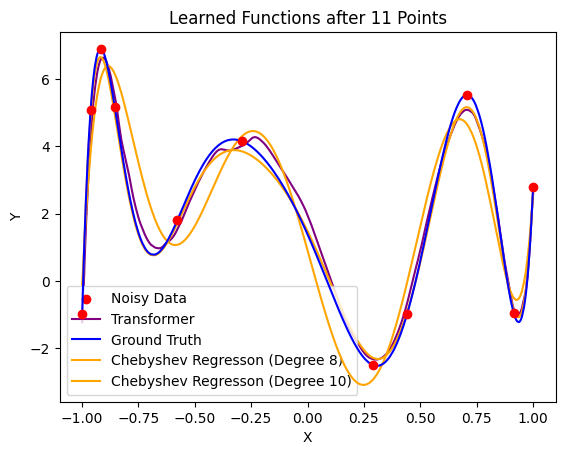

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 11, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 11 points: tensor([[[-0.9750]]])


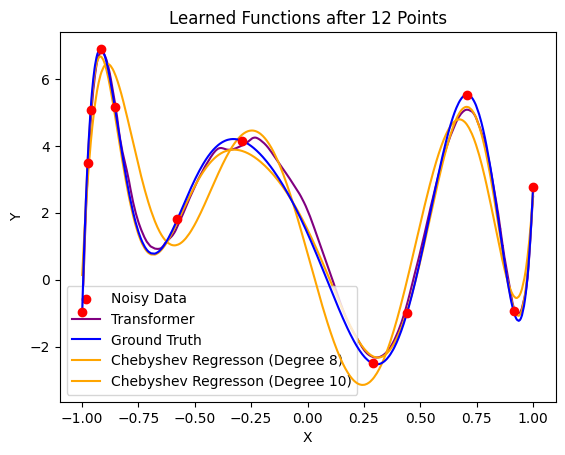

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 12, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 12 points: tensor([[[-0.0080]]])


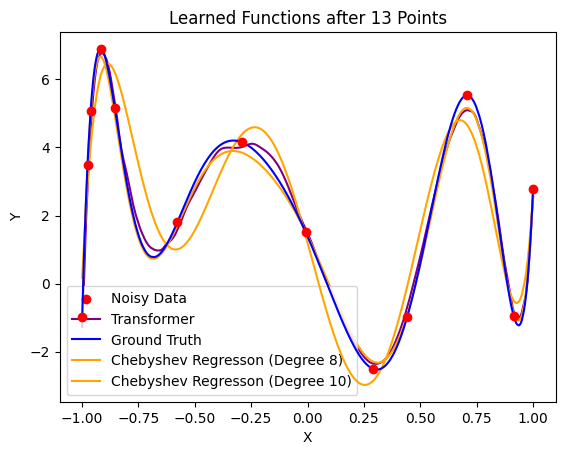

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 13, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 13 points: tensor([[[-0.9897]]])


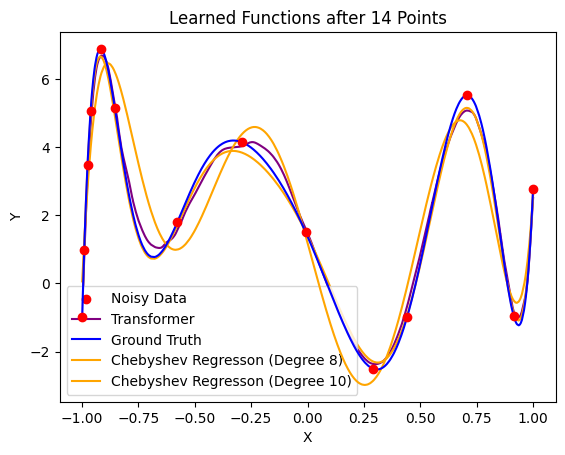

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 14, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 14 points: tensor([[[-0.1352]]])


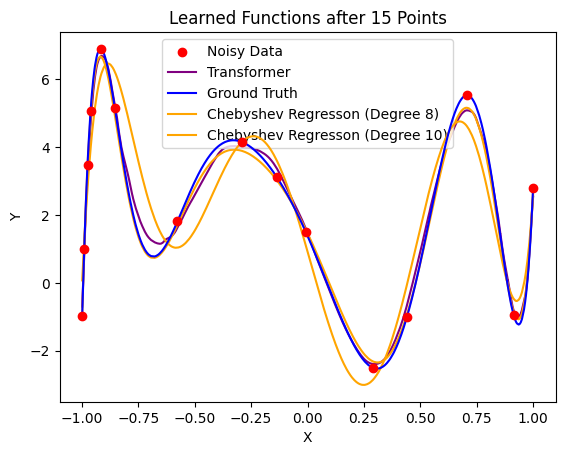

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 15, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 15 points: tensor([[[-0.7425]]])


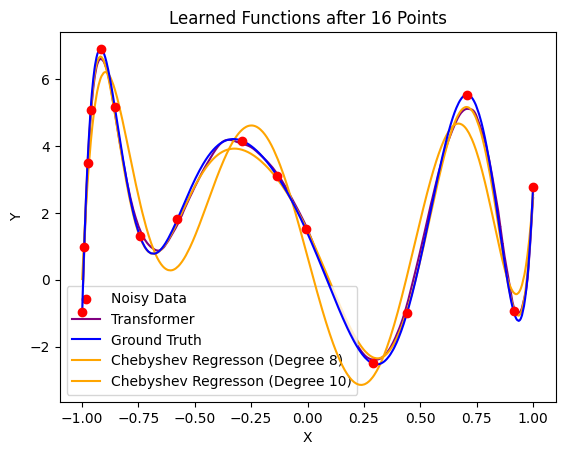

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 16, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 16 points: tensor([[[0.6945]]])


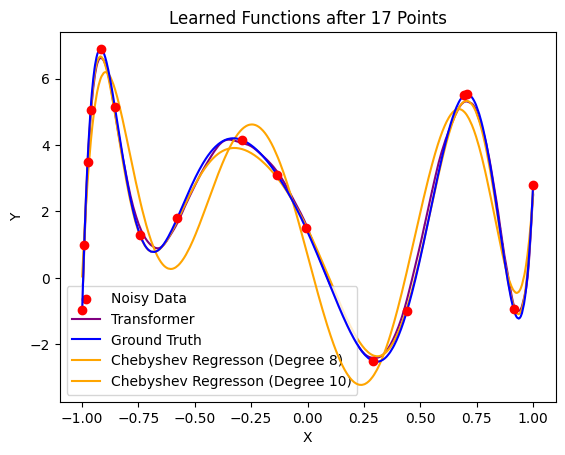

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 17, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 17 points: tensor([[[0.4814]]])


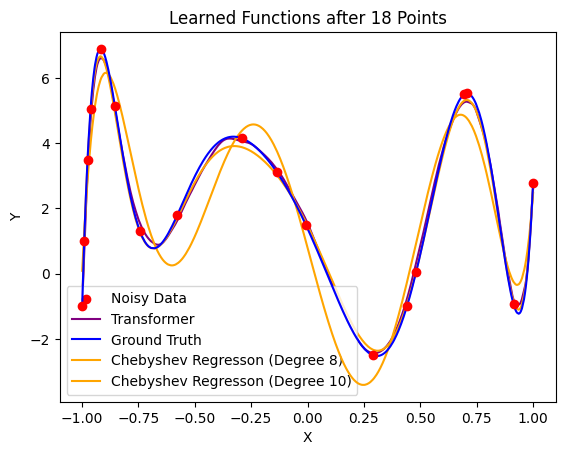

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 18, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 18 points: tensor([[[-0.9897]]])


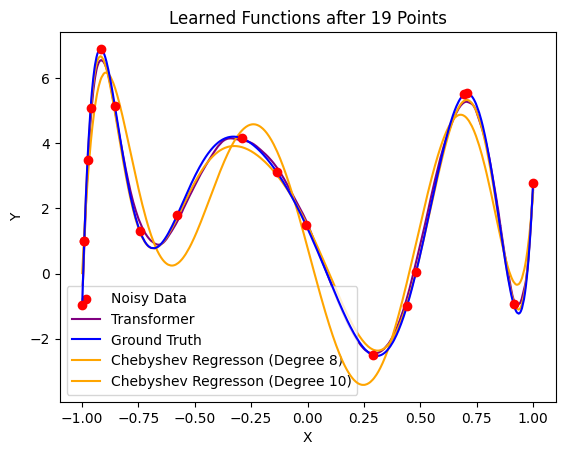

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 19, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 19 points: tensor([[[-0.9539]]])


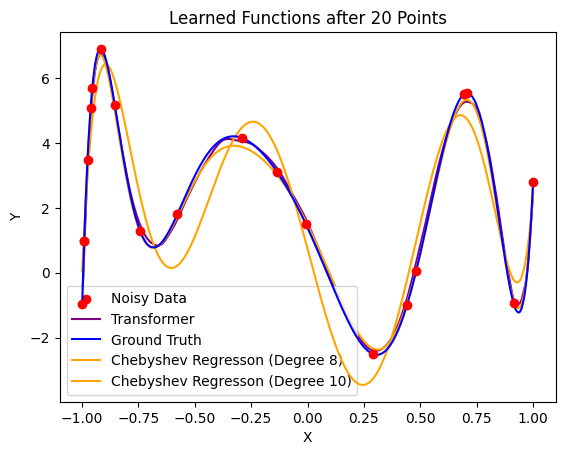

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 20, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 20 points: tensor([[[-0.9897]]])


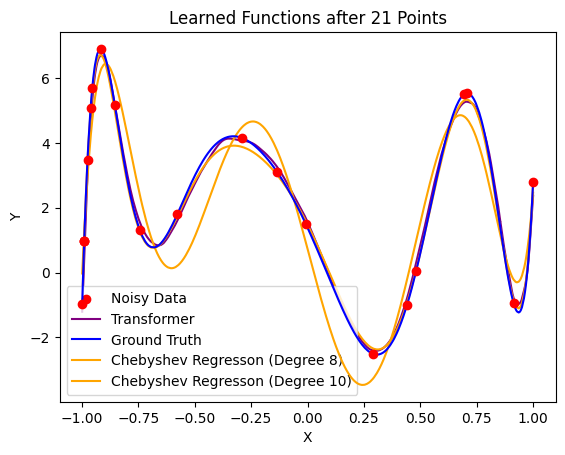

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 21, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 21 points: tensor([[[-0.9897]]])


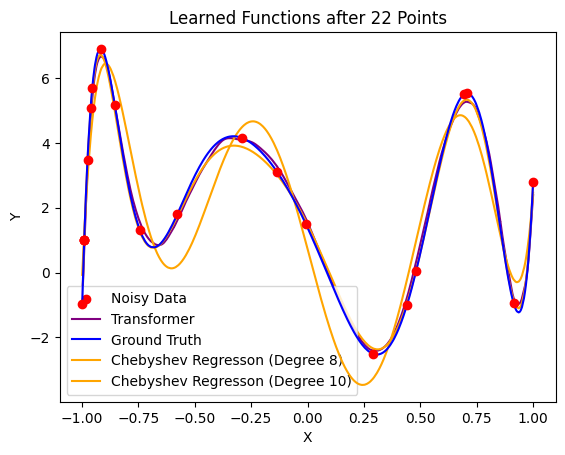

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 22, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 22 points: tensor([[[0.9997]]])


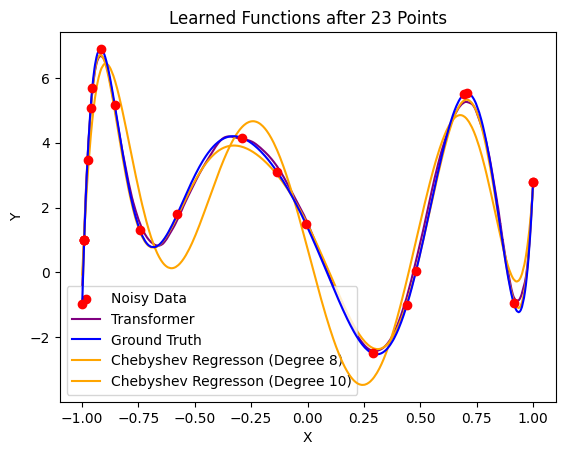

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 23, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 23 points: tensor([[[-0.9985]]])


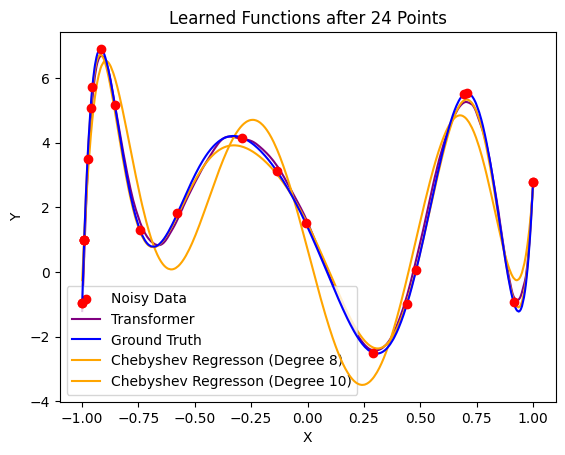

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 24, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 24 points: tensor([[[-0.9897]]])


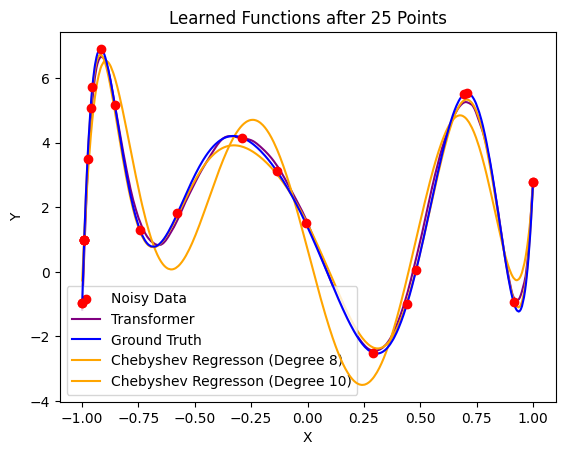

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 25, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 25 points: tensor([[[-0.9849]]])


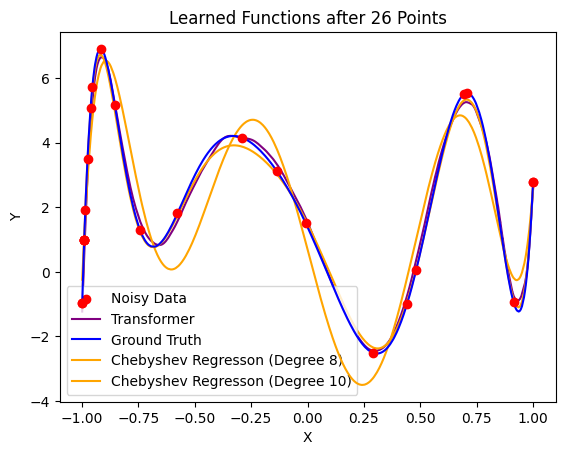

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 26, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 26 points: tensor([[[-0.9849]]])


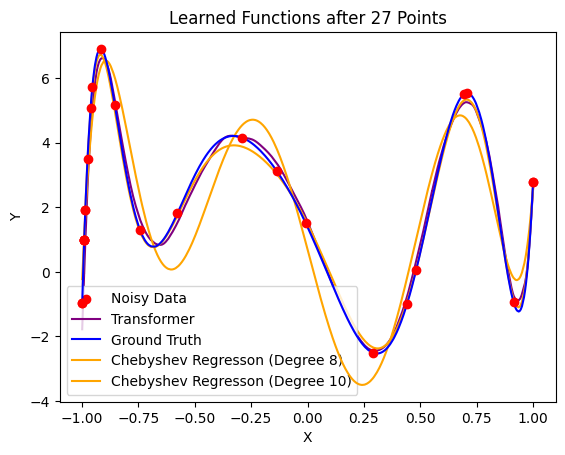

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 27, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 27 points: tensor([[[-0.9849]]])


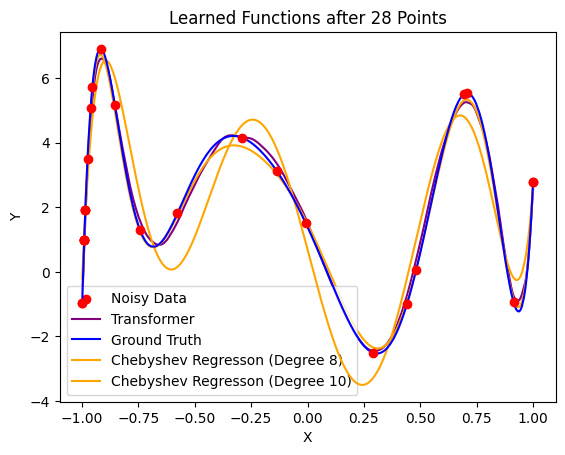

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 28, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 28 points: tensor([[[-0.9539]]])


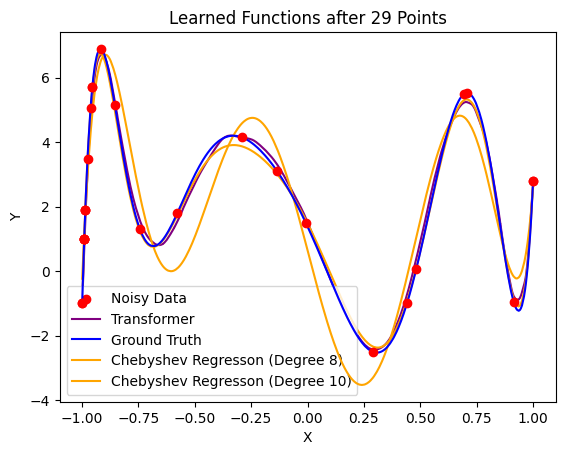

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 29, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 29 points: tensor([[[0.9505]]])


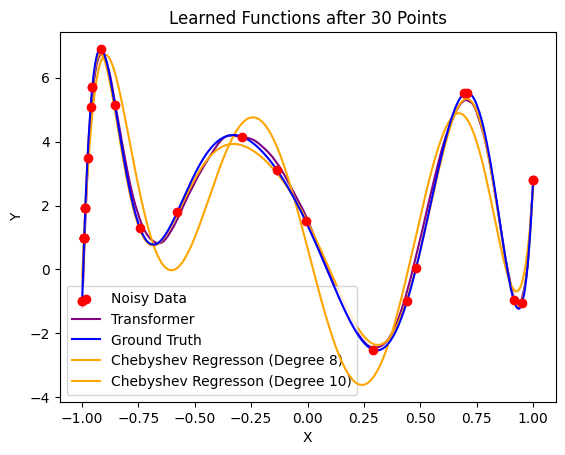

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 30, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 30 points: tensor([[[-0.9897]]])


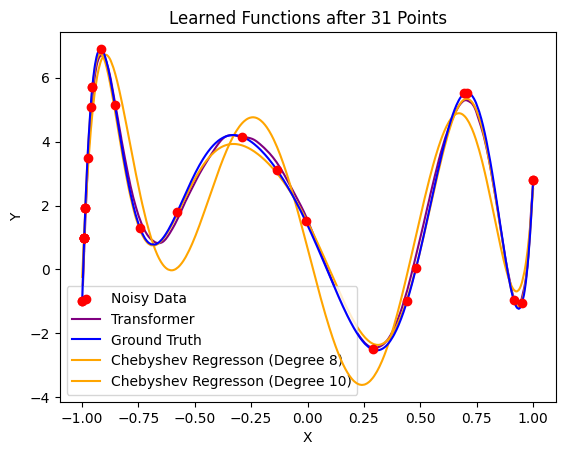

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 31, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 31 points: tensor([[[-0.9849]]])


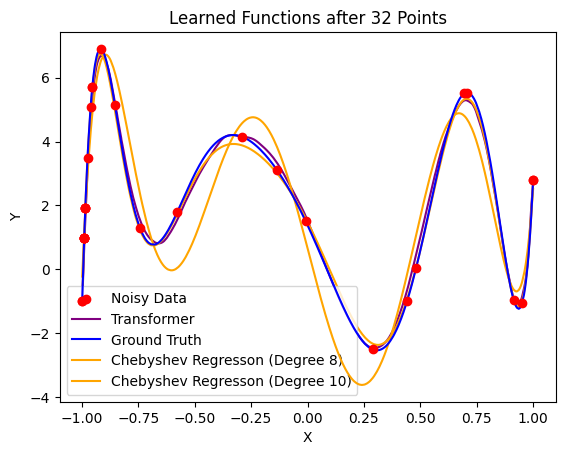

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 32, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 32 points: tensor([[[0.4851]]])


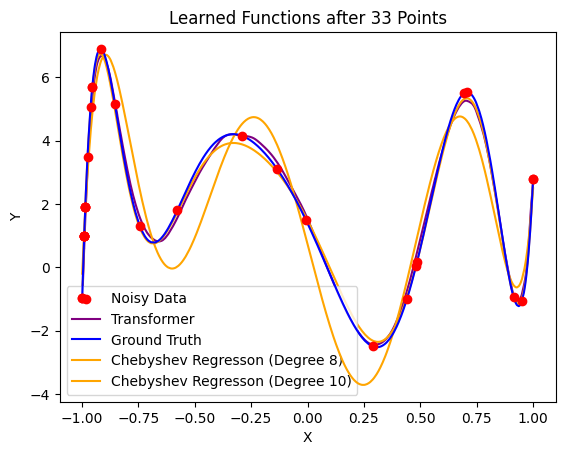

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 33, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 33 points: tensor([[[-0.9849]]])


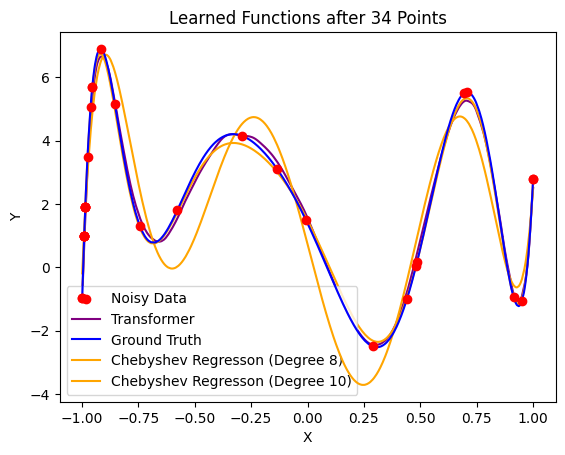

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 34, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 34 points: tensor([[[-0.9578]]])


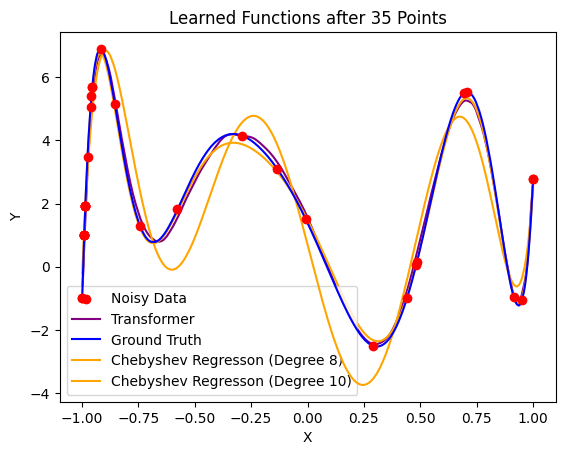

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 35, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 35 points: tensor([[[-0.9849]]])


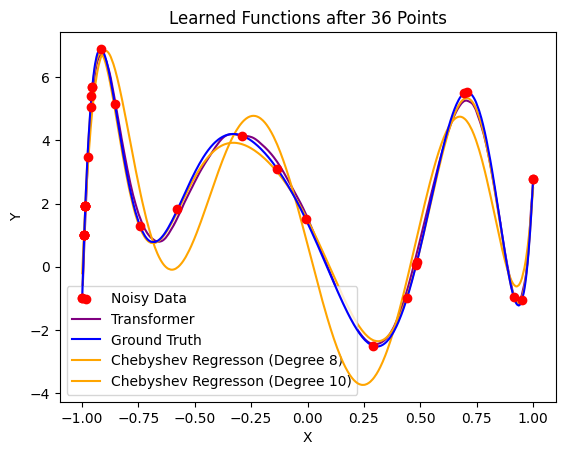

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 36, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 36 points: tensor([[[-0.9897]]])


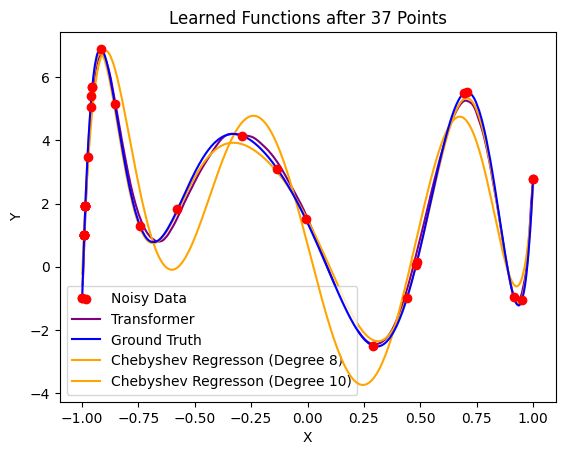

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 37, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 37 points: tensor([[[0.9877]]])


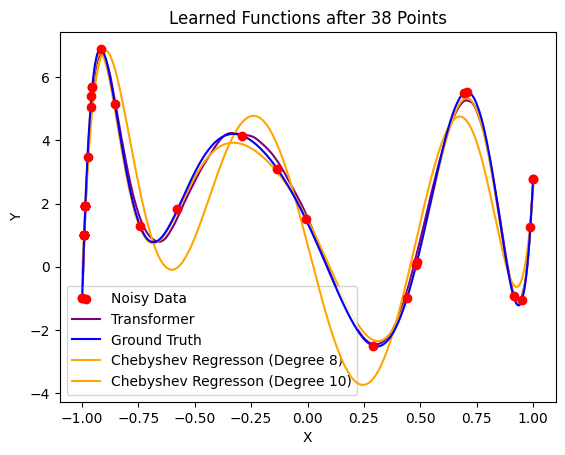

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 38, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 38 points: tensor([[[-0.9578]]])


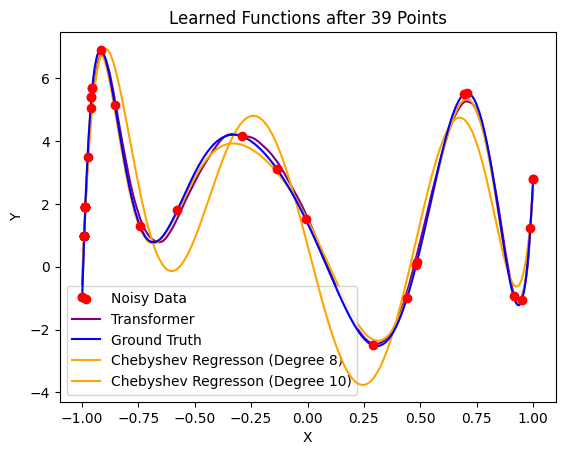

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 39, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 39 points: tensor([[[-0.9985]]])


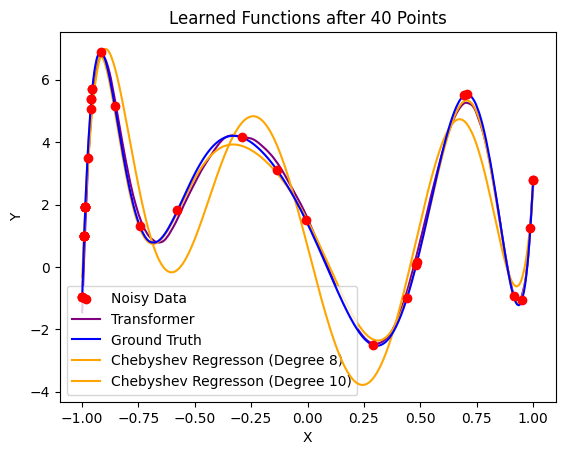

ground truth:  torch.Size([1000])
predicted:  torch.Size([1000])
xs:  torch.Size([1, 1000, 1])
xs shape:  torch.Size([1, 40, 1])
x largest error:  torch.Size([1, 1, 1])
largest error at 40 points: tensor([[[-0.9849]]])


In [9]:
run_id = "chebyshev-noise-0.5"  # if you train more models, replace with the run_id from the table above
run_dir = "../models"
task_name = "kernel_linear_regression"
sampler = UniformSampler(n_dims=1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1, basis_dim=10, different_degrees=False, lowest_degree=10, highest_degree=10)
run_path = os.path.join(run_dir, task_name, run_id)
model, conf = get_model_from_run(run_path, -1)
transformer_model = model.cuda().eval()
more_xs_for_graphing_truth = sampler.sample_xs(1000, 1)
extra_indices = np.argsort(more_xs_for_graphing_truth.squeeze())
extra_ys = task.evaluate(more_xs_for_graphing_truth, noise=False)
extra_ys = extra_ys.squeeze()
extra_ys = extra_ys[extra_indices]
model = ChebyshevKernelLeastSquaresModel(basis_dim=10)
model_no_ridge = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=10, ridge=0.5)
model_low_degree = ChebyshevKernelLeastSquaresModelWithRidge(basis_dim=8, ridge=0.5)
def plot_performance(xs, ys):
    extra_transformer_estimated = get_imputed_ys(transformer_model, task, xs, ys, more_xs_for_graphing_truth, noise=True, smoothing=0)
    extra_predicted = model.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    no_ridge_predicted = model_no_ridge.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    low_degree_predicted = model_low_degree.return_trained_model(xs, ys)(more_xs_for_graphing_truth)
    low_degree_predicted = low_degree_predicted.squeeze()[extra_indices]
    extra_predicted = extra_predicted.squeeze()[extra_indices]
    extra_transformer_estimated = extra_transformer_estimated.squeeze()[extra_indices]
    no_ridge_predicted = no_ridge_predicted.squeeze()[extra_indices]
    graphing_x = more_xs_for_graphing_truth.squeeze()[extra_indices]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Learned Functions after ' + str(i) + ' Points')
    ax.scatter(xs.squeeze(), ys.squeeze(), color='red', label='Noisy Data',zorder=3000)
    ax.plot(graphing_x, extra_transformer_estimated, color='purple', label='Transformer')
    #ax.plot(graphing_x, extra_predicted, color='green', label='Chebyshev Regresson (Degree 9)', zorder=1000)
    ax.plot(graphing_x, extra_ys, color='blue', label='Ground Truth',zorder=2000)
    ax.plot(graphing_x, low_degree_predicted, color='orange', label='Chebyshev Regresson (Degree 8)', zorder=500)
    ax.plot(graphing_x, no_ridge_predicted, color='orange', label='Chebyshev Regresson (Degree 10)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    plt.savefig('polynomials/chebyshev_kernel_regression_' + str(i) + '.png')
    plt.show()
    return extra_transformer_estimated

def find_x_value_with_largest_error(ground_truth, predicted, xs):
    print("ground truth: ", ground_truth.shape)
    print("predicted: ", predicted.shape)
    print("xs: ", xs.shape)
    
    graphing_x = xs.squeeze()[extra_indices]
    errors = np.abs(ground_truth - predicted)
    max_error_index = np.argmax(errors)
    return torch.tensor([[[graphing_x[max_error_index]]]])
    
all_xs = sampler.sample_xs(1, 1)
for i in range(1, 41, 1):
    all_ys = task.evaluate(all_xs, noise=False)
    learned_model = plot_performance(all_xs, all_ys)
    largest_error_x = find_x_value_with_largest_error(extra_ys, learned_model, more_xs_for_graphing_truth)
    print("xs shape: ", all_xs.shape)
    print("x largest error: ", largest_error_x.shape)
    print("largest error at " + str(i) + " points: " + str(largest_error_x))
    all_xs = torch.cat((all_xs, largest_error_x), axis=1)
